In [1]:
import numpy as np
import pandas as pd

In [2]:
from NNet import NNet

In [18]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
#we will use digits data => https://www.kaggle.com/competitions/digit-recognizer/data
#Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train.shape

(42000, 785)

In [12]:
X = train.iloc[:,1:]
y = pd.get_dummies(train["label"])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [14]:
X_train.shape , y_train.shape

((29400, 784), (29400, 10))

In [60]:
#function to visualize history
def plot_history(history):
    fig,ax = plt.subplots(figsize = (15,8))
    ax.plot(history["loss"])
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss" , color ="darkblue")
    ax.tick_params("y",colors="darkblue")
    
    ax2 = ax.twinx()

    ax2.set_ylabel("Accuracy" , color = "orange")
    ax2.plot(history["accuracy"] ,color = "orange")
    ax2.tick_params("y", colors="orange")

## Try different activation functions and compare 

In [15]:
#My model have two hidden layers. Define the model with 256 units in hidden layers.

model = NNet(input_size = 784 , hidden_size = 256 , output_size = 10)

In [16]:
#tanh
tanh_history = model.train(X_train.values , y_train.values, learning_rate = 0.1 , activation = "tanh" , epochs = 100)

Epoch 0 / 100 : loss: 2.420031534469353  -  accuracy: 15.697278911564627%
Epoch 1 / 100 : loss: 2.256308146125227  -  accuracy: 31.656462585034014%
Epoch 2 / 100 : loss: 2.1154443717526474  -  accuracy: 42.45918367346938%
Epoch 3 / 100 : loss: 1.990894687053628  -  accuracy: 49.85034013605442%
Epoch 4 / 100 : loss: 1.8793358437769958  -  accuracy: 55.40816326530612%
Epoch 5 / 100 : loss: 1.7786682793752333  -  accuracy: 59.693877551020414%
Epoch 6 / 100 : loss: 1.687210695883321  -  accuracy: 62.92857142857143%
Epoch 7 / 100 : loss: 1.6044852058123433  -  accuracy: 65.43877551020408%
Epoch 8 / 100 : loss: 1.5295314576949166  -  accuracy: 67.50680272108843%
Epoch 9 / 100 : loss: 1.461063743688299  -  accuracy: 69.0952380952381%
Epoch 10 / 100 : loss: 1.3984795368771488  -  accuracy: 70.62925170068027%
Epoch 11 / 100 : loss: 1.341134919515037  -  accuracy: 71.7687074829932%
Epoch 12 / 100 : loss: 1.2885833751559583  -  accuracy: 72.74829931972789%
Epoch 13 / 100 : loss: 1.240153293270114

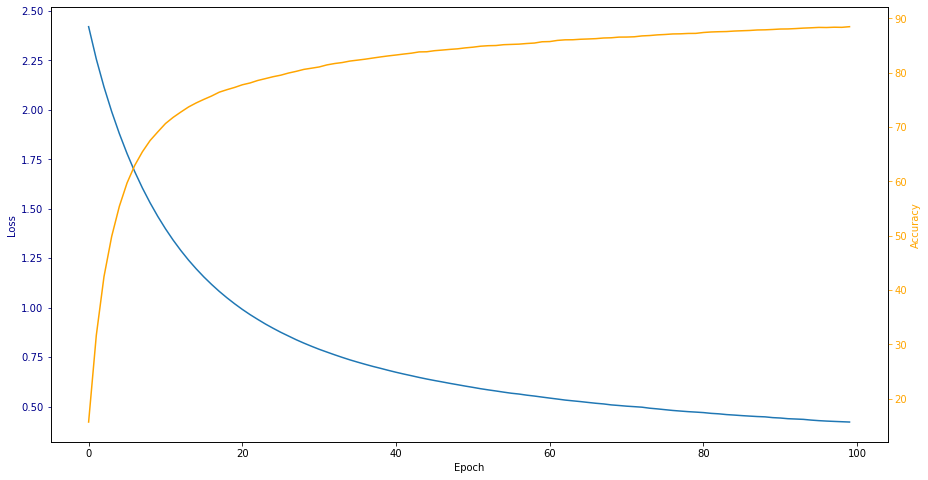

In [57]:
plot_history(tanh_history)

In [58]:
#sigmoid
model = NNet(input_size = 784 , hidden_size = 256 , output_size = 10)
sigmoid_history = model.train(X_train.values , y_train.values, learning_rate = 0.1 , activation = "sigmoid" , epochs = 100)

C:\Users\alper\Desktop\ders\2022-2023\bahar\btös\odev1\NNet.py:39: RuntimeWarning: overflow encountered in exp
  return (1/(1 + np.exp(-x)))


Epoch 0 / 100 : loss: 2.3267015127917112  -  accuracy: 13.534013605442178%
Epoch 1 / 100 : loss: 2.294258107976654  -  accuracy: 17.180272108843536%
Epoch 2 / 100 : loss: 2.2851860872766108  -  accuracy: 20.139455782312925%
Epoch 3 / 100 : loss: 2.2774448779259524  -  accuracy: 22.26190476190476%
Epoch 4 / 100 : loss: 2.2698096419531884  -  accuracy: 24.24829931972789%
Epoch 5 / 100 : loss: 2.2622048634422205  -  accuracy: 26.14965986394558%
Epoch 6 / 100 : loss: 2.2546215327423242  -  accuracy: 28.112244897959183%
Epoch 7 / 100 : loss: 2.2470391568518853  -  accuracy: 30.003401360544217%
Epoch 8 / 100 : loss: 2.2394486328814738  -  accuracy: 32.08503401360544%
Epoch 9 / 100 : loss: 2.2318460032530227  -  accuracy: 33.87755102040816%
Epoch 10 / 100 : loss: 2.2242525437032605  -  accuracy: 35.75170068027211%
Epoch 11 / 100 : loss: 2.2166399636366574  -  accuracy: 37.26870748299319%
Epoch 12 / 100 : loss: 2.2090208781226996  -  accuracy: 38.82312925170068%
Epoch 13 / 100 : loss: 2.201368

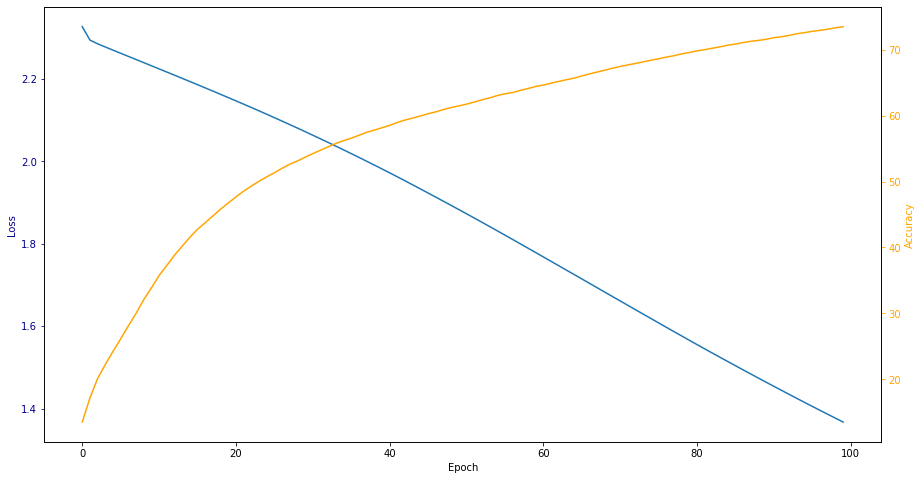

In [61]:
plot_history(sigmoid_history)

In [63]:
#relu
model = NNet(input_size = 784 , hidden_size = 256 , output_size = 10)
relu_history = model.train(X_train.values , y_train.values, learning_rate = 0.1 , activation = "relu" , epochs = 2)

Epoch 0 / 2 : loss: nan  -  accuracy: 9.829931972789115%
Epoch 1 / 2 : loss: nan  -  accuracy: 9.829931972789115%


* As we can see, loss is NaN. Model is not learning.

## This problem is called 'Exploding Gradients'

* To solve this problem, let's normalize the data.

In [64]:
from sklearn import preprocessing

X_train_normalize = preprocessing.normalize(X_train)

In [67]:
#try again 
#relu
model = NNet(input_size = 784 , hidden_size = 256 , output_size = 10)
relu_history = model.train(X_train_normalize , y_train.values, learning_rate = 0.1 , activation = "relu" , epochs = 100)

Epoch 0 / 100 : loss: 2.30206662881166  -  accuracy: 13.833333333333334%
Epoch 1 / 100 : loss: 2.300765295617419  -  accuracy: 14.387755102040817%
Epoch 2 / 100 : loss: 2.299468085772393  -  accuracy: 15.010204081632653%
Epoch 3 / 100 : loss: 2.2981745120606227  -  accuracy: 15.799319727891156%
Epoch 4 / 100 : loss: 2.296884047740239  -  accuracy: 16.761904761904763%
Epoch 5 / 100 : loss: 2.2955961476071196  -  accuracy: 17.785714285714285%
Epoch 6 / 100 : loss: 2.294310305305851  -  accuracy: 18.7891156462585%
Epoch 7 / 100 : loss: 2.2930259943702733  -  accuracy: 19.833333333333332%
Epoch 8 / 100 : loss: 2.291742739110521  -  accuracy: 20.904761904761905%
Epoch 9 / 100 : loss: 2.290460089606337  -  accuracy: 22.153061224489797%
Epoch 10 / 100 : loss: 2.2891776187166455  -  accuracy: 23.20408163265306%
Epoch 11 / 100 : loss: 2.2878948818710034  -  accuracy: 24.306122448979593%
Epoch 12 / 100 : loss: 2.2866114161355093  -  accuracy: 25.173469387755105%
Epoch 13 / 100 : loss: 2.28532677

* With normalizing data, we solved the Exploding Gradients for ReLu. It works perfect.
* With more epoch, accuracy will increase. In this experiment, we only train on 100 epochs.

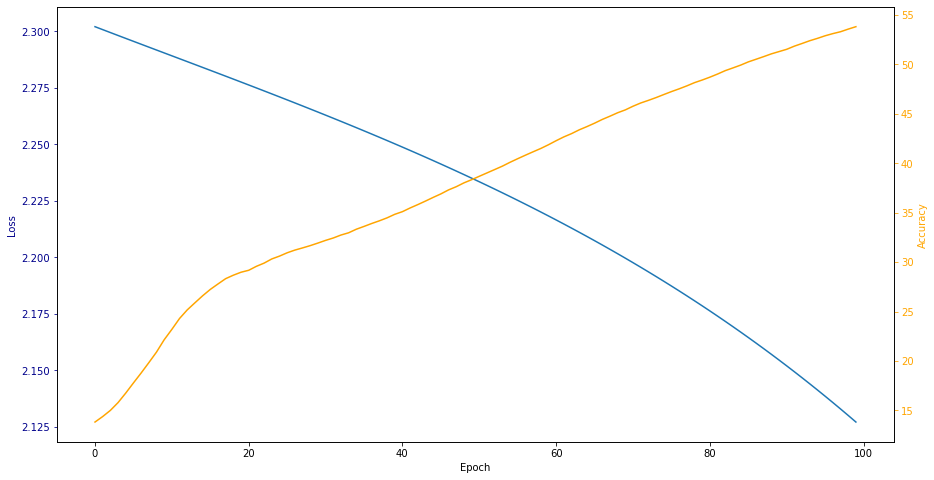

In [68]:
plot_history(relu_history)

In [69]:
#Leaky Relu
model = NNet(input_size = 784 , hidden_size = 256 , output_size = 10)
relu_history = model.train(X_train.values , y_train.values, learning_rate = 0.1 , activation = "leaky_relu" , epochs = 2)

C:\Users\alper\Desktop\ders\2022-2023\bahar\btös\odev1\NNet.py:14: RuntimeWarning: overflow encountered in exp
  exp_ = np.exp(z)
C:\Users\alper\Desktop\ders\2022-2023\bahar\btös\odev1\NNet.py:15: RuntimeWarning: invalid value encountered in true_divide
  return exp_ / np.sum(exp_ , axis = 1 , keepdims=True)


Epoch 0 / 2 : loss: nan  -  accuracy: 9.829931972789115%
Epoch 1 / 2 : loss: nan  -  accuracy: 9.829931972789115%


* As ReLu, we have Exploding Gradients problem in Leaky Relu too.
* Let's use normalized data in there too.

In [72]:
#Leaky relu
model = NNet(input_size = 784 , hidden_size = 256 , output_size = 10)
leakyrelu_history = model.train(X_train_normalize , y_train.values, learning_rate = 0.1 , activation = "leaky_relu" , epochs = 100)

Epoch 0 / 100 : loss: 2.3039986719549517  -  accuracy: 12.51360544217687%
Epoch 1 / 100 : loss: 2.3025424301884807  -  accuracy: 12.897959183673468%
Epoch 2 / 100 : loss: 2.301090380680328  -  accuracy: 13.248299319727892%
Epoch 3 / 100 : loss: 2.2996414017286297  -  accuracy: 13.676870748299319%
Epoch 4 / 100 : loss: 2.2981944342166707  -  accuracy: 14.153061224489797%
Epoch 5 / 100 : loss: 2.2967485214911396  -  accuracy: 14.47278911564626%
Epoch 6 / 100 : loss: 2.2953027136397903  -  accuracy: 14.83673469387755%
Epoch 7 / 100 : loss: 2.2938558758815173  -  accuracy: 15.187074829931973%
Epoch 8 / 100 : loss: 2.292407240782819  -  accuracy: 15.496598639455783%
Epoch 9 / 100 : loss: 2.2909557220118644  -  accuracy: 15.863945578231291%
Epoch 10 / 100 : loss: 2.289500250546964  -  accuracy: 16.282312925170068%
Epoch 11 / 100 : loss: 2.2880400154176073  -  accuracy: 16.76530612244898%
Epoch 12 / 100 : loss: 2.2865740753302206  -  accuracy: 17.244897959183675%
Epoch 13 / 100 : loss: 2.2851

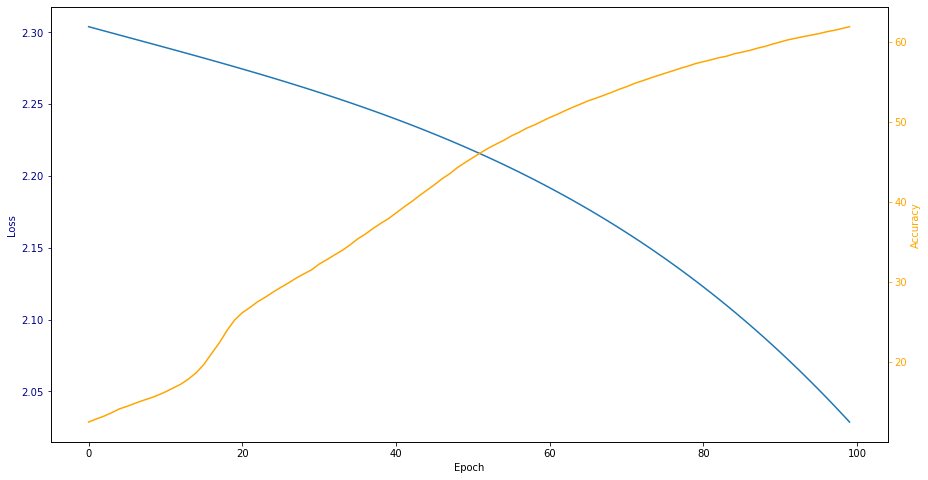

In [73]:
plot_history(leakyrelu_history)

* Comparing four model on 100 epochs with four different activation function, tanh is best with 88% accuracy and 0.42 loss.

* Let's try the model with tanh activation on different learning rates : 0.01 , 0.1 , 0.3 , 0.7 , 1

In [78]:
lr = [0.01 , 0.1 , 0.3 , 0.7 , 1]
results = dict()
for i in lr:
    print("Training for lr: {}".format(i))
    model = NNet(input_size = 784 , hidden_size = 256 , output_size = 10)
    history = model.train(X_train.values , y_train.values, learning_rate = i , activation = "tanh" , epochs = 100)
    results[i] = history

Training for lr: 0.01
Epoch 0 / 100 : loss: 2.344810037902076  -  accuracy: 11.904761904761903%
Epoch 1 / 100 : loss: 2.3266464311965858  -  accuracy: 12.931972789115646%
Epoch 2 / 100 : loss: 2.3088107808547984  -  accuracy: 14.105442176870747%
Epoch 3 / 100 : loss: 2.2913541871394165  -  accuracy: 15.173469387755102%
Epoch 4 / 100 : loss: 2.274271070304534  -  accuracy: 16.360544217687075%
Epoch 5 / 100 : loss: 2.2574950861073204  -  accuracy: 17.77551020408163%
Epoch 6 / 100 : loss: 2.2409660003007144  -  accuracy: 19.12925170068027%
Epoch 7 / 100 : loss: 2.2247359465308323  -  accuracy: 20.54421768707483%
Epoch 8 / 100 : loss: 2.2087490282572744  -  accuracy: 21.989795918367346%
Epoch 9 / 100 : loss: 2.1929917820221965  -  accuracy: 23.53061224489796%
Epoch 10 / 100 : loss: 2.1775238431364756  -  accuracy: 25.081632653061227%
Epoch 11 / 100 : loss: 2.162274598380937  -  accuracy: 26.493197278911563%
Epoch 12 / 100 : loss: 2.1472109506748183  -  accuracy: 28.051020408163264%
Epoch 1

Epoch 10 / 100 : loss: 1.3376668912667316  -  accuracy: 72.40136054421768%
Epoch 11 / 100 : loss: 1.2801417123484728  -  accuracy: 73.48299319727892%
Epoch 12 / 100 : loss: 1.2275493160615567  -  accuracy: 74.45578231292517%
Epoch 13 / 100 : loss: 1.1801347324777467  -  accuracy: 75.29931972789116%
Epoch 14 / 100 : loss: 1.1368993621128392  -  accuracy: 75.96598639455783%
Epoch 15 / 100 : loss: 1.096805758329533  -  accuracy: 76.67687074829932%
Epoch 16 / 100 : loss: 1.0606284212506212  -  accuracy: 77.21088435374149%
Epoch 17 / 100 : loss: 1.0272725383468502  -  accuracy: 77.72448979591837%
Epoch 18 / 100 : loss: 0.9960460140003212  -  accuracy: 78.22448979591837%
Epoch 19 / 100 : loss: 0.9677622289847259  -  accuracy: 78.66326530612245%
Epoch 20 / 100 : loss: 0.9413833476342186  -  accuracy: 78.99659863945578%
Epoch 21 / 100 : loss: 0.9172336944933704  -  accuracy: 79.35374149659864%
Epoch 22 / 100 : loss: 0.8939852583894903  -  accuracy: 79.75510204081633%
Epoch 23 / 100 : loss: 0.8

Epoch 20 / 100 : loss: 0.5150351294170058  -  accuracy: 86.18367346938776%
Epoch 21 / 100 : loss: 0.5033651374117217  -  accuracy: 86.51360544217687%
Epoch 22 / 100 : loss: 0.49233921362360816  -  accuracy: 86.70068027210884%
Epoch 23 / 100 : loss: 0.48195180276507626  -  accuracy: 87.08163265306122%
Epoch 24 / 100 : loss: 0.4707885561261304  -  accuracy: 87.16666666666667%
Epoch 25 / 100 : loss: 0.46134143454481896  -  accuracy: 87.4421768707483%
Epoch 26 / 100 : loss: 0.45400028603851267  -  accuracy: 87.48639455782313%
Epoch 27 / 100 : loss: 0.44615798366981047  -  accuracy: 87.90136054421768%
Epoch 28 / 100 : loss: 0.4379389942412455  -  accuracy: 87.921768707483%
Epoch 29 / 100 : loss: 0.4301103720241779  -  accuracy: 88.22789115646259%
Epoch 30 / 100 : loss: 0.4236216410080578  -  accuracy: 88.43877551020408%
Epoch 31 / 100 : loss: 0.41637077837381825  -  accuracy: 88.69047619047619%
Epoch 32 / 100 : loss: 0.41088553420442026  -  accuracy: 88.80272108843538%
Epoch 33 / 100 : loss

Epoch 29 / 100 : loss: 0.3045541001120158  -  accuracy: 91.46938775510203%
Epoch 30 / 100 : loss: 0.2977142960361261  -  accuracy: 91.51020408163265%
Epoch 31 / 100 : loss: 0.2927060232683915  -  accuracy: 91.5%
Epoch 32 / 100 : loss: 0.2937045901523815  -  accuracy: 91.22448979591836%
Epoch 33 / 100 : loss: 0.2941249063260764  -  accuracy: 91.35034013605441%
Epoch 34 / 100 : loss: 0.29511302499207365  -  accuracy: 91.16666666666666%
Epoch 35 / 100 : loss: 0.2943401676578039  -  accuracy: 91.31632653061224%
Epoch 36 / 100 : loss: 0.2957308857806586  -  accuracy: 90.79591836734694%
Epoch 37 / 100 : loss: 0.2991883641702803  -  accuracy: 91.06802721088435%
Epoch 38 / 100 : loss: 0.2978545612547153  -  accuracy: 90.93537414965986%
Epoch 39 / 100 : loss: 0.2918722215963038  -  accuracy: 91.24489795918367%
Epoch 40 / 100 : loss: 0.2909488885414821  -  accuracy: 91.41496598639456%
Epoch 41 / 100 : loss: 0.28128852832369844  -  accuracy: 91.7687074829932%
Epoch 42 / 100 : loss: 0.277404146674

Epoch 38 / 100 : loss: 23.341764212866916  -  accuracy: 10.421768707482993%
Epoch 39 / 100 : loss: 24.7513800037107  -  accuracy: 9.66326530612245%
Epoch 40 / 100 : loss: 24.960962238705665  -  accuracy: 11.190476190476192%
Epoch 41 / 100 : loss: 22.682062089197967  -  accuracy: 9.850340136054422%
Epoch 42 / 100 : loss: 24.909271552944574  -  accuracy: 9.687074829931973%
Epoch 43 / 100 : loss: 24.954383424154255  -  accuracy: 10.377551020408163%
Epoch 44 / 100 : loss: 22.166769307074002  -  accuracy: 9.829931972789115%
Epoch 45 / 100 : loss: 22.70387995425801  -  accuracy: 9.020408163265307%
Epoch 46 / 100 : loss: 23.914891914312594  -  accuracy: 10.051020408163264%
Epoch 47 / 100 : loss: 22.16456896962666  -  accuracy: 9.908163265306122%
Epoch 48 / 100 : loss: 16.965640710323292  -  accuracy: 11.190476190476192%
Epoch 49 / 100 : loss: 17.68772372401756  -  accuracy: 10.377551020408163%
Epoch 50 / 100 : loss: 20.45216079205985  -  accuracy: 9.66326530612245%
Epoch 51 / 100 : loss: 24.2

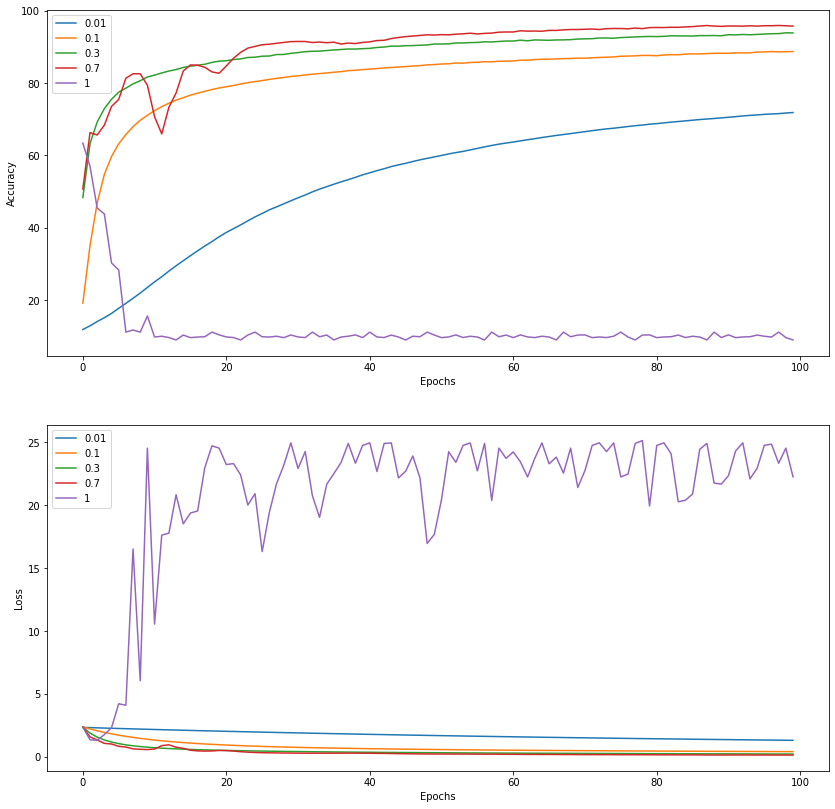

In [94]:
fig,ax = plt.subplots(figsize = (14,14) , nrows = 2 , ncols = 1)
ax[0].plot(results[0.01]["accuracy"] , label = "0.01")
ax[0].plot(results[0.1]["accuracy"] , label = "0.1")
ax[0].plot(results[0.3]["accuracy"] , label = "0.3")
ax[0].plot(results[0.7]["accuracy"] , label = "0.7")
ax[0].plot(results[1]["accuracy"] , label = "1")
ax[0].legend()
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epochs")

ax[1].plot(results[0.01]["loss"] , label = "0.01")
ax[1].plot(results[0.1]["loss"] , label = "0.1")
ax[1].plot(results[0.3]["loss"] , label = "0.3")
ax[1].plot(results[0.7]["loss"] , label = "0.7")
ax[1].plot(results[1]["loss"] , label = "1")
ax[1].legend()
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epochs")

plt.show()

* As we can see, with using learning rate = 1, model is not learning

## This is Exploding Gradients problem

* Because of learning rate = 1 => 1 * gradients stay larger than it should be, and gradients will be larger in network.

* Observations: 0.7 learning rate looks best model, but it might be overfitted.